# K均值介绍

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import K_Means_Project1.K_Means as KM1

## 载入并展示数据

In [2]:
"""
函数说明：将文本文档中的数据读入到python中

Parameters:
    fileName - 文件名
    
Returns:
    dataMat - 数据矩阵

Modify:
    2018-08-02
"""
def loadDataSet(fileName):
    dataMat = []
    fr = open(fileName)
    for line in fr.readlines():
        curLine = line.strip().split('\t')
        fltLine = list(map(float, curLine))
        dataMat.append(fltLine)
    return dataMat

In [3]:
data = np.array(loadDataSet("K_Means_Project1/testSet.txt"))

In [4]:
data

array([[ 1.658985,  4.285136],
       [-3.453687,  3.424321],
       [ 4.838138, -1.151539],
       [-5.379713, -3.362104],
       [ 0.972564,  2.924086],
       [-3.567919,  1.531611],
       [ 0.450614, -3.302219],
       [-3.487105, -1.724432],
       [ 2.668759,  1.594842],
       [-3.156485,  3.191137],
       [ 3.165506, -3.999838],
       [-2.786837, -3.099354],
       [ 4.208187,  2.984927],
       [-2.123337,  2.943366],
       [ 0.704199, -0.479481],
       [-0.39237 , -3.963704],
       [ 2.831667,  1.574018],
       [-0.790153,  3.343144],
       [ 2.943496, -3.357075],
       [-3.195883, -2.283926],
       [ 2.336445,  2.875106],
       [-1.786345,  2.554248],
       [ 2.190101, -1.90602 ],
       [-3.403367, -2.778288],
       [ 1.778124,  3.880832],
       [-1.688346,  2.230267],
       [ 2.592976, -2.054368],
       [-4.007257, -3.207066],
       [ 2.257734,  3.387564],
       [-2.679011,  0.785119],
       [ 0.939512, -4.023563],
       [-3.674424, -2.261084],
       [

Text(0, 0.5, 'Y')

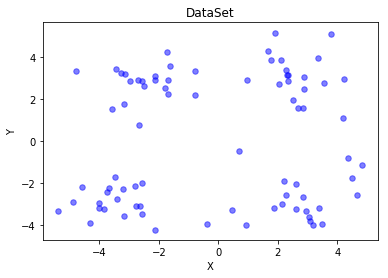

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(data[:,0], data[:,1], s=30, c='b', marker='o', alpha=.5)
plt.title("DataSet")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# K-均值算法：
K-均值中的$k$是聚类簇个数的意思，簇个数$k$是用户指定的，每个簇都有各自的质心。
算法流程描述为：
- 第一步，创建$k$个点作为质心(一般是随机选择)
- 第二步，将数据集中的每个点分配至一个簇中
- 第三步，更新所有簇的质心
- 第四步，重复第二三步，直到所有数据点的簇分配结果不再改变为止

## 计算数据点之间的距离

In [20]:
"""
函数说明：数据向量计算欧式距离

Parameters:
    vecA - 数据向量A
    vecB - 数据向量B
    
Returns:
    两个向量之间的欧几里德距离

Modify:
    2018-08-02
"""
def distEclud(vecA, vecB):
    return np.sqrt(np.sum(np.power(vecA - vecB, 2)))

## 随机初始化质心

In [21]:
"""
函数说明：随机初始化k个质心（质心满足数据边界之内）

Parameters:
    dataSet - 输入的数据集
    k - 选取k个质心
    
Returns:
    centroids - 返回初始化得到的k个质心向量

Modify:
    2018-08-02
"""
def randCent(dataSet, k):
    # 得到数据样本的维度
    n = np.shape(dataSet)[1]
    # 初始化为一个(k,n)的全零矩阵
    centroids = np.mat(np.zeros((k, n)))
    # 遍历数据集的每一个维度
    for j in range(n):
        # 得到该列数据的最小值,最大值
        minJ = np.min(dataSet[:, j])
        maxJ = np.max(dataSet[:, j])
        # 得到该列数据的范围(最大值-最小值)
        rangeJ = float(maxJ - minJ)
        # k个质心向量的第j维数据值随机为位于(最小值，最大值)内的某一值
        # Create an array of the given shape and populate it with random samples from a uniform distribution over [0, 1).
        centroids[:, j] = minJ + rangeJ * np.random.rand(k, 1)
    # 返回初始化得到的k个质心向量
    return centroids

In [22]:
def plotCent(dataSet,k):
    # 随机获取质心
    centroids = randCent(dataSet,k)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(dataSet[:,0],dataSet[:,1],s=30,c="b",marker="o",alpha=0.5)
    for i in range(k):
        ax.scatter(centroids[i,0],centroids[i,1],s=100, c='r', marker='+', alpha=1.0)
    

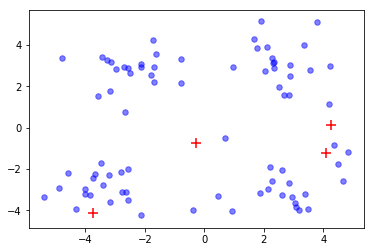

In [25]:
plotCent(data,4)

## K-均值算法实现

In [26]:
"""
函数说明：k-means聚类算法

Parameters:
    dataSet - 用于聚类的数据集
    k - 选取k个质心
    distMeas - 距离计算方法,默认欧氏距离distEclud()
    createCent - 获取k个质心的方法,默认随机获取randCent()
    
Returns:
    centroids - k个聚类的聚类结果
    clusterAssment - 聚类误差

Modify:
    2018-08-02
"""
def kMeans(dataSet, k, distMeas=distEclud, createCent=randCent):
    # 获取数据集样本数
    m = np.shape(dataSet)[0]
    # 初始化一个（m,2）全零矩阵
    clusterAssment = np.mat(np.zeros((m, 2)))
    # 创建初始的k个质心向量
    centroids = createCent(dataSet, k)
    # 聚类结果是否发生变化的布尔类型
    clusterChanged = True
    # 只要聚类结果一直发生变化，就一直执行聚类算法，直至所有数据点聚类结果不发生变化
    while clusterChanged:
        # 聚类结果变化布尔类型置为False
        clusterChanged = False
        # 遍历数据集每一个样本向量
        for i in range(m):
            # 初始化最小距离为正无穷，最小距离对应的索引为-1
            minDist = float('inf')
            minIndex = -1
            # 循环k个类的质心
            for j in range(k):
                # 计算数据点到质心的欧氏距离
                distJI = distMeas(centroids[j, :], dataSet[i, :])
                # 如果距离小于当前最小距离
                if distJI < minDist:
                    # 当前距离为最小距离，最小距离对应索引应为j(第j个类)
                    minDist = distJI
                    minIndex = j
            # 当前聚类结果中第i个样本的聚类结果发生变化：布尔值置为True，继续聚类算法
            if clusterAssment[i, 0] != minIndex: 
                clusterChanged = True
            # 更新当前变化样本的聚类结果和平方误差
            clusterAssment[i, :] = minIndex, minDist**2
            # 打印k-means聚类的质心
        # print(centroids)
        # 遍历每一个质心
        for cent in range(k):
            # 将数据集中所有属于当前质心类的样本通过条件过滤筛选出来
            ptsInClust = dataSet[np.nonzero(clusterAssment[:, 0].A == cent)[0]]
            # 计算这些数据的均值(axis=0:求列均值)，作为该类质心向量
            centroids[cent, :] = np.mean(ptsInClust, axis=0)
    # 返回k个聚类，聚类结果及误差
    return centroids, clusterAssment

## 绘制聚类结果

In [27]:
"""
函数说明：绘制数据集

Parameters:
    fileName - 文件名
    
Returns:
    None

Modify:
    2018-08-01
"""
def plotDataSet(filename):
    # 导入数据
    datMat = np.mat(loadDataSet(filename))
    # 进行k-means算法其中k为4
    myCentroids, clustAssing = kMeans(datMat, 4)
    clustAssing = clustAssing.tolist()
    myCentroids = myCentroids.tolist()
    xcord = [[], [], [], []]
    ycord = [[], [], [], []]
    datMat = datMat.tolist()
    m = len(clustAssing)
    for i in range(m):
        if int(clustAssing[i][0]) == 0:
            xcord[0].append(datMat[i][0])
            ycord[0].append(datMat[i][1])
        elif int(clustAssing[i][0]) == 1:
            xcord[1].append(datMat[i][0])
            ycord[1].append(datMat[i][1])
        elif int(clustAssing[i][0]) == 2:
            xcord[2].append(datMat[i][0])
            ycord[2].append(datMat[i][1])
        elif int(clustAssing[i][0]) == 3:
            xcord[3].append(datMat[i][0])
            ycord[3].append(datMat[i][1])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    # 绘制样本点
    ax.scatter(xcord[0], ycord[0], s=20, c='b', marker='*', alpha=.5)
    ax.scatter(xcord[1], ycord[1], s=20, c='r', marker='D', alpha=.5)
    ax.scatter(xcord[2], ycord[2], s=20, c='c', marker='>', alpha=.5)
    ax.scatter(xcord[3], ycord[3], s=20, c='k', marker='o', alpha=.5)
    # 绘制质心
    ax.scatter(myCentroids[0][0], myCentroids[0][1], s=100, c='k', marker='+', alpha=.5)
    ax.scatter(myCentroids[1][0], myCentroids[1][1], s=100, c='k', marker='+', alpha=.5)
    ax.scatter(myCentroids[2][0], myCentroids[2][1], s=100, c='k', marker='+', alpha=.5)
    ax.scatter(myCentroids[3][0], myCentroids[3][1], s=100, c='k', marker='+', alpha=.5)
    plt.title('DataSet')
    plt.xlabel('X')
    plt.show()

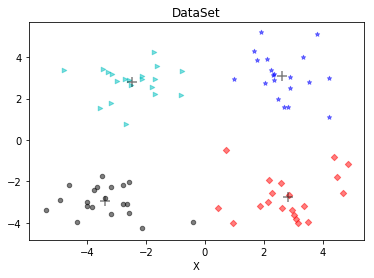

In [29]:
plotDataSet("K_Means_Project1/testSet.txt")